Observation 1:  Capomulin was the only drug able to reduce the size of the tumor.

Observation 2: Capomulin had the best success at reducing metastic sites, important for cancers with circulating tumor cells.

Observation 3:  These two combined attributes contribut to Capumolin having the best survival rate.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem

In [2]:
# Import data into data frames
pharma_data = pd.read_csv("raw_data/clinicaltrial_data.csv")
mouse_data = pd.read_csv("raw_data/mouse_drug_data.csv")

print(pharma_data.head())
print(mouse_data.head())

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0
  Mouse ID      Drug
0     f234  Stelasyn
1     x402  Stelasyn
2     a492  Stelasyn
3     w540  Stelasyn
4     v764  Stelasyn


In [3]:
# Combine data frames
combined_data = pd.merge(pharma_data,mouse_data,on="Mouse ID")

drugs = combined_data["Drug"].unique()
days = combined_data["Timepoint"].unique()

selected=["Capomulin", "Infubinol", "Ketapril", "Placebo"]
filtered_data=combined_data[combined_data['Drug'].isin(selected)]

filtered_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [4]:
# Volume changes over time by drug
drug_df = filtered_data.groupby(["Drug","Timepoint"])

tumor_vol = drug_df["Tumor Volume (mm3)"].mean()

drug_affect_vol = pd.DataFrame({"Tumor Volume (mm3)": tumor_vol})
drug_affect_vol.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [5]:
#for each drug in drugs, average of Tumer Volume over time

size_unstacked = drug_affect_vol.unstack(level=-2, fill_value=None)
size_unstacked

Tumor Volume (mm3)                                 
Drug               Capomulin  Infubinol   Ketapril    Placebo
Timepoint                                                    
0                  45.000000  45.000000  45.000000  45.000000
5                  44.266086  47.062001  47.389175  47.125589
10                 43.084291  49.403909  49.582269  49.423329
15                 42.064317  51.296397  52.399974  51.359742
20                 40.716325  53.197691  54.920935  54.364417
25                 39.939528  55.715252  57.678982  57.482574
30                 38.769339  58.299397  60.994507  59.809063
35                 37.816839  60.742461  63.371686  62.420615
40                 36.958001  63.162824  66.068580  65.052675
45                 36.236114  65.755562  70.662958  68.084082

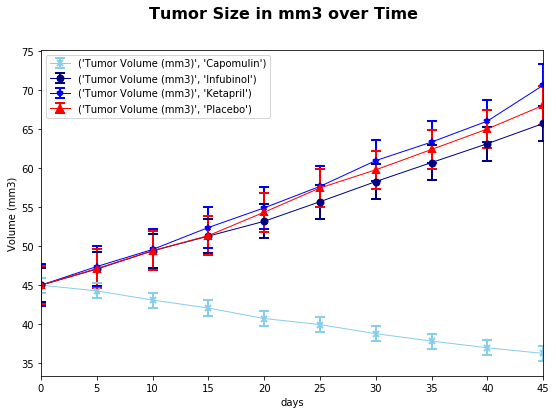

In [17]:
cap = size_unstacked.iloc[:,0]
cap_sem = size_unstacked.iloc[:,0].sem()
inf = size_unstacked.iloc[:,1]
inf_sem=size_unstacked.iloc[:,1].sem()
ket = size_unstacked.iloc[:,2]
ket_sem=size_unstacked.iloc[:,2].sem()
plac = size_unstacked.iloc[:,3]
plac_sem=size_unstacked.iloc[:,3].sem()

fig, (ax) = plt.subplots()
fig.suptitle("Tumor Size in mm3 over Time", fontsize=16, fontweight="bold")

plt.rcParams["figure.figsize"] = [9,5]

ax.errorbar(days, cap, cap_sem, linewidth=1, marker="x", color = "skyblue", capsize=5, elinewidth=2, markeredgewidth=2)
ax.errorbar(days, inf, inf_sem, linewidth=1, marker="o", color = "navy", capsize=5, elinewidth=2, markeredgewidth=2)
ax.errorbar(days, ket, ket_sem, linewidth=1, marker="*", color = "blue", capsize=5, elinewidth=2, markeredgewidth=2)
ax.errorbar(days, plac, plac_sem, linewidth=1, marker="^", color = "red", capsize=5, elinewidth=2, markeredgewidth=2)

ax.set_xlim(0, 45)
ax.set_xlabel("days")
ax.set_ylabel("Volume (mm3)")
ax.legend(loc="upper left")


plt.show()

In [7]:
# Metastic Site changes over time by drug
drug_df = filtered_data.groupby(["Drug","Timepoint"])

met_sites = drug_df["Metastatic Sites"].mean()

drug_affect_sites = pd.DataFrame({"Metastatic Sites": met_sites})

sites_unstacked = drug_affect_sites.unstack(level=-2, fill_value=None)
sites_unstacked

Metastatic Sites                              
Drug             Capomulin Infubinol  Ketapril   Placebo
Timepoint                                               
0                 0.000000  0.000000  0.000000  0.000000
5                 0.160000  0.280000  0.304348  0.375000
10                0.320000  0.666667  0.590909  0.833333
15                0.375000  0.904762  0.842105  1.250000
20                0.652174  1.050000  1.210526  1.526316
25                0.818182  1.277778  1.631579  1.941176
30                1.090909  1.588235  2.055556  2.266667
35                1.181818  1.666667  2.294118  2.642857
40                1.380952  2.100000  2.733333  3.166667
45                1.476190  2.111111  3.363636  3.272727

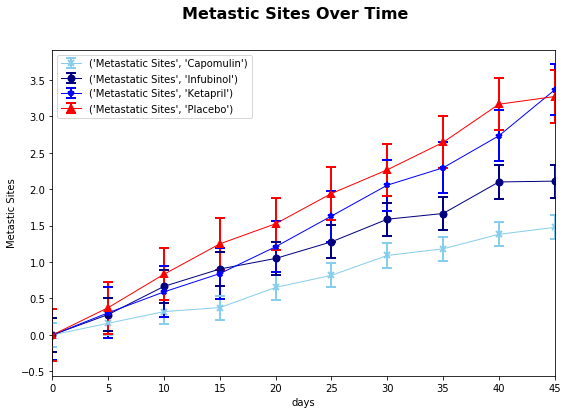

In [8]:
cap = sites_unstacked.iloc[:,0]
cap_sem = sites_unstacked.iloc[:,0].sem()
inf = sites_unstacked.iloc[:,1]
inf_sem=sites_unstacked.iloc[:,1].sem()
ket = sites_unstacked.iloc[:,2]
ket_sem=sites_unstacked.iloc[:,2].sem()
plac = sites_unstacked.iloc[:,3]
plac_sem=sites_unstacked.iloc[:,3].sem()

fig, (ax) = plt.subplots()
fig.suptitle("Metastic Sites Over Time", fontsize=16, fontweight="bold")

plt.rcParams["figure.figsize"] = [9, 6]

ax.errorbar(days, cap, cap_sem, linewidth=1, marker="x", color = "skyblue", capsize=5, elinewidth=2, markeredgewidth=2)
ax.errorbar(days, inf, inf_sem, linewidth=1, marker="o", color = "navy", capsize=5, elinewidth=2, markeredgewidth=2)
ax.errorbar(days, ket, ket_sem, linewidth=1, marker="*", color = "blue", capsize=5, elinewidth=2, markeredgewidth=2)
ax.errorbar(days, plac, plac_sem, linewidth=1, marker="^", color = "red", capsize=5, elinewidth=2, markeredgewidth=2)

ax.set_xlim(0, 45)
ax.set_xlabel("days")
ax.set_ylabel("Metastic Sites")
ax.legend(loc="upper left")


plt.show()

In [9]:
# Survival Rate
drug_df = filtered_data.groupby(["Drug","Timepoint"])

survival_rate = drug_df["Mouse ID"].count()/25*100

survival_df = pd.DataFrame({"Mouse Count": survival_rate})

mouse_unstacked = survival_df.unstack(level=-2, fill_value=None)

mouse_unstacked

Mouse Count                           
Drug        Capomulin Infubinol Ketapril Placebo
Timepoint                                       
0               100.0     100.0    100.0   100.0
5               100.0     100.0     92.0    96.0
10              100.0      84.0     88.0    96.0
15               96.0      84.0     76.0    80.0
20               92.0      80.0     76.0    76.0
25               88.0      72.0     76.0    68.0
30               88.0      68.0     72.0    60.0
35               88.0      48.0     68.0    56.0
40               84.0      40.0     60.0    48.0
45               84.0      36.0     44.0    44.0

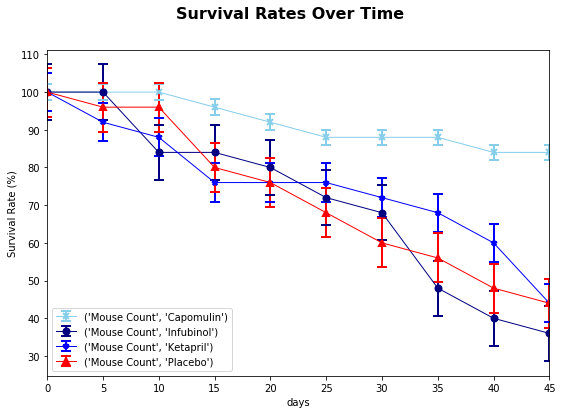

In [10]:
cap = mouse_unstacked.iloc[:,0]
cap_sem = mouse_unstacked.iloc[:,0].sem()
inf = mouse_unstacked.iloc[:,1]
inf_sem=mouse_unstacked.iloc[:,1].sem()
ket = mouse_unstacked.iloc[:,2]
ket_sem=mouse_unstacked.iloc[:,2].sem()
plac = mouse_unstacked.iloc[:,3]
plac_sem=mouse_unstacked.iloc[:,3].sem()

fig, (ax) = plt.subplots()
fig.suptitle("Survival Rates Over Time", fontsize=16, fontweight="bold")

plt.rcParams["figure.figsize"] = [9,6]

ax.errorbar(days, cap, cap_sem, linewidth=1, marker="x", color = "skyblue", capsize=5, elinewidth=2, markeredgewidth=2)
ax.errorbar(days, inf, inf_sem, linewidth=1, marker="o", color = "navy", capsize=5, elinewidth=2, markeredgewidth=2)
ax.errorbar(days, ket, ket_sem, linewidth=1, marker="*", color = "blue", capsize=5, elinewidth=2, markeredgewidth=2)
ax.errorbar(days, plac, plac_sem, linewidth=1, marker="^", color = "red", capsize=5, elinewidth=2, markeredgewidth=2)

ax.set_xlim(0, 45)
ax.set_xlabel("days")
ax.set_ylabel("Survival Rate (%)")
ax.legend(loc="lower left")


plt.show()

In [11]:
#Total change in tumor
final_size = filtered_data.loc[combined_data["Timepoint"] == 45,:]

size_drug= final_size.groupby(["Drug"])

vol_change = size_drug["Tumor Volume (mm3)"].mean()-45
positive = vol_change > 0
vol_diff = pd.DataFrame({"% Change in Volume": vol_change, "Positive": positive})
vol_diff = vol_diff.replace([True,False],['red','green'])

#vol_diff["Tumor Volume (mm3)"]=vol_diff["Tumor Volume (mm3)"].map("{:.1f}".format)

vol_diff

,% Change in Volume,Positive
Drug,,
Capomulin,-8.763886,green
Infubinol,20.755562,red
Ketapril,25.662958,red
Placebo,23.084082,red


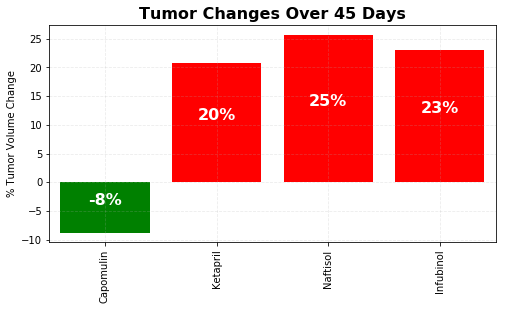

In [15]:
changes = vol_diff.iloc[:,0]
x_axis=np.arange(0,len(vol_diff["% Change in Volume"]),1)

fig, (ax) = plt.subplots()

plt.title("Tumor Changes Over 45 Days", fontsize=16, fontweight="bold")

plt.ylabel("% Tumor Volume Change")

plt.rcParams["figure.figsize"] = [6,4]

rects=ax.bar(x_axis, changes, color=vol_diff["Positive"].tolist())

ax.xaxis.set_ticks(np.arange(0,len(drugs),1))
ax.set_xticklabels(drugs, rotation='vertical')
plt.grid(alpha=0.25, linestyle="dashed")

plt.xlim(-0.5,3.5)


for rect in rects:
    h1 = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2., h1 / 2., "%d" % h1+"%", ha="center", va="bottom", color="white", fontsize=16, fontweight="bold")
